# Spambase Data Set Visualization

## Import packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#bokeh
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Turbo256
from bokeh.plotting import figure
from bokeh.transform import factor_cmap

plt.style.use("fivethirtyeight")

## Load dataset

#### UCI ML data source:<br>
[Spambase Data Set](https://archive.ics.uci.edu/ml/datasets/Spambase)

In [2]:
DATA_FOLDER_PATH = os.path.join(os.getcwd(), "data")
DATA_NAMES_PATH = os.path.join(DATA_FOLDER_PATH, "spambase.names")
DATA_PATH = os.path.join(DATA_FOLDER_PATH, "spambase.data")

In [3]:
col_names = pd.DataFrame(np.vstack(pd.read_csv(DATA_NAMES_PATH, comment="|").iloc[:, 0].str.split(":").values))[0].tolist() + ["spam"]
df = pd.read_csv(DATA_PATH, header=None)
df.columns = col_names

In [4]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


Exporting data as csv file

In [5]:
df.to_csv(os.path.join(DATA_FOLDER_PATH, "spambase_data.csv"), index=False)

## EDA | Data visualization

#### Checking percentage of SPAM/NON-SPAM values

In [6]:
def plot_figure(title, l=15, b=8):
    plt.figure(figsize=(l, b))
    plt.title(title)
    
def plot_labels(xlabel, ylabel):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

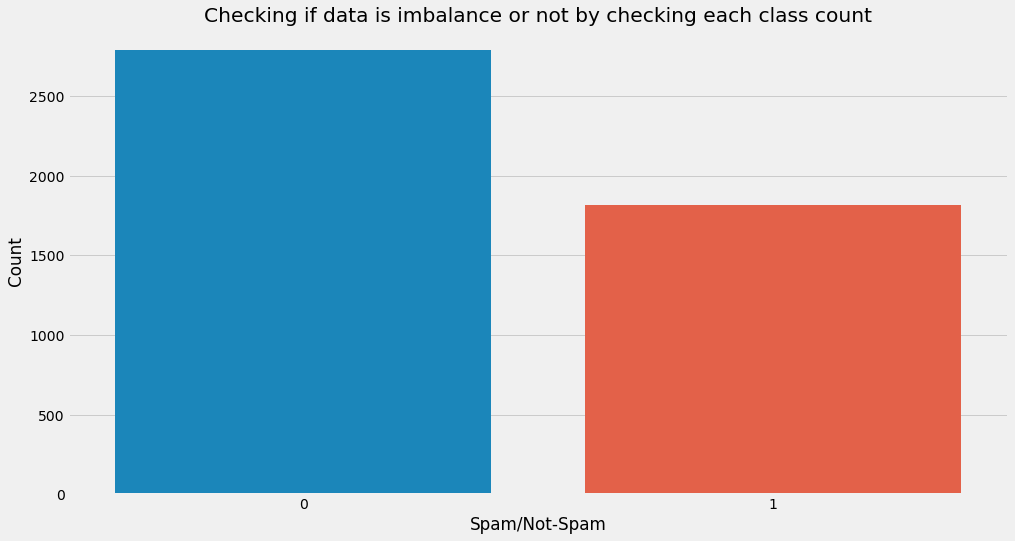

In [7]:
plot_figure("Checking if data is imbalance or not by checking each class count")
sns.countplot(x=df["spam"])
plot_labels("Spam/Not-Spam", "Count")

#### Pearson correlation Heatmap

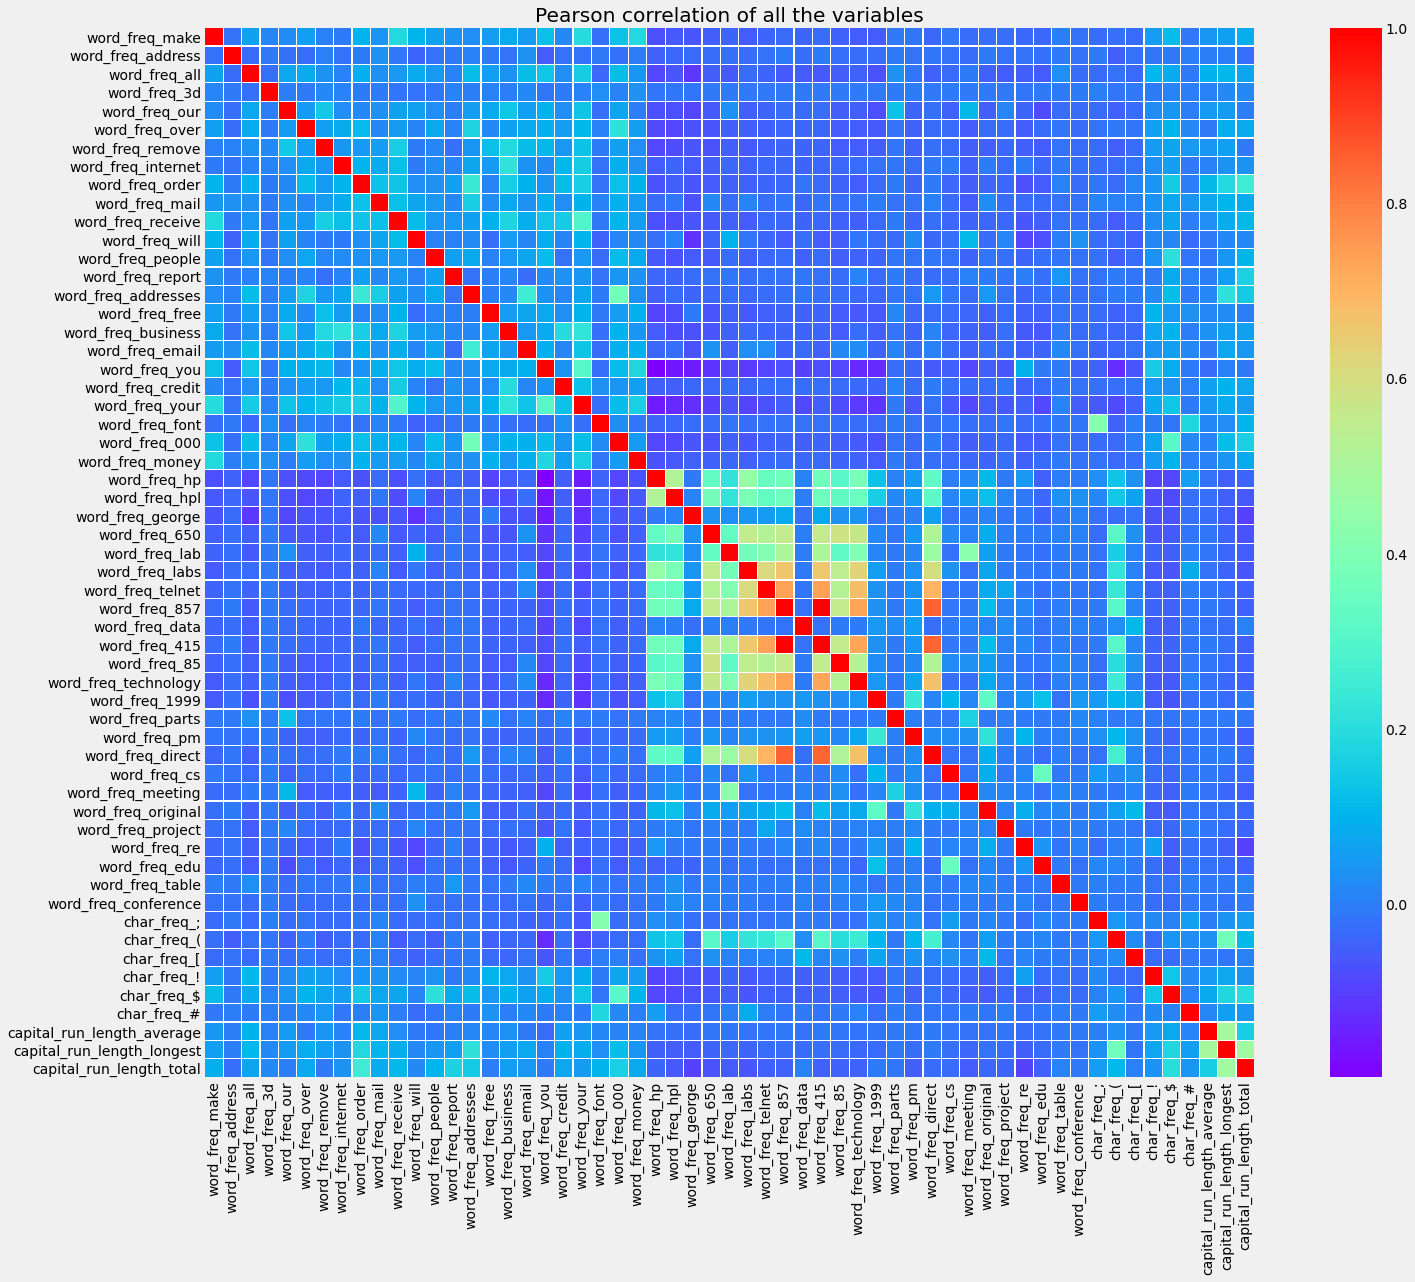

In [8]:
plot_figure("Pearson correlation of all the variables",
            24, 18)
sns.heatmap(df.iloc[:, :-1].corr(),
            xticklabels=df.columns[:-1],
            yticklabels=df.columns[:-1],
            cmap="rainbow",
            square=True,
            linewidths=0.2)
plt.show()

#### Heatmap of top 5 most correlated variables

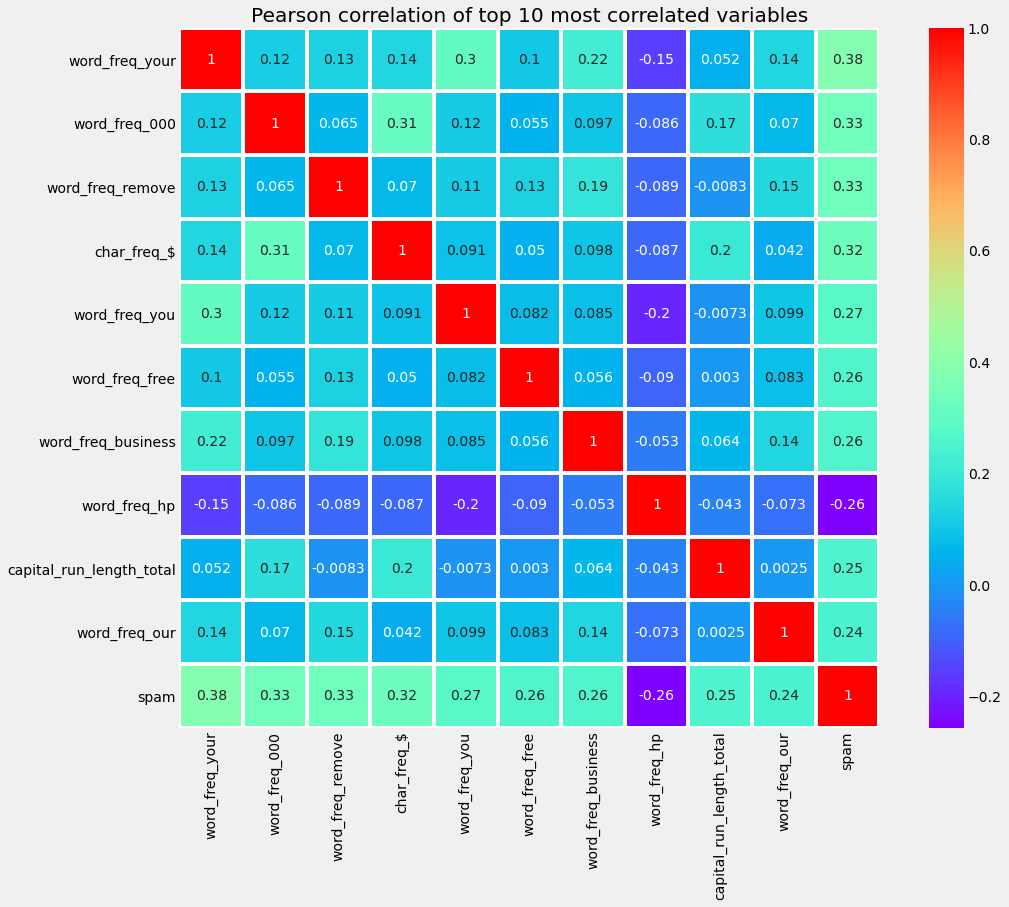

In [9]:
# top 10 most correlated variables
top_10_cols = df.corr().abs().sort_values("spam", ascending=False).iloc[1:11].index.tolist()
top_5_cols = top_10_cols[:5]

plot_figure("Pearson correlation of top 10 most correlated variables",
            16, 12)
sns.heatmap(df[top_10_cols+["spam"]].corr(),
            xticklabels=df[top_10_cols+["spam"]].columns,
            yticklabels=df[top_10_cols+["spam"]].columns,
            cmap="rainbow",
            square=True,
            annot=True,
            linewidths=3)
plt.show()

#### Pairplot of top five most correlated variables with dependent variable

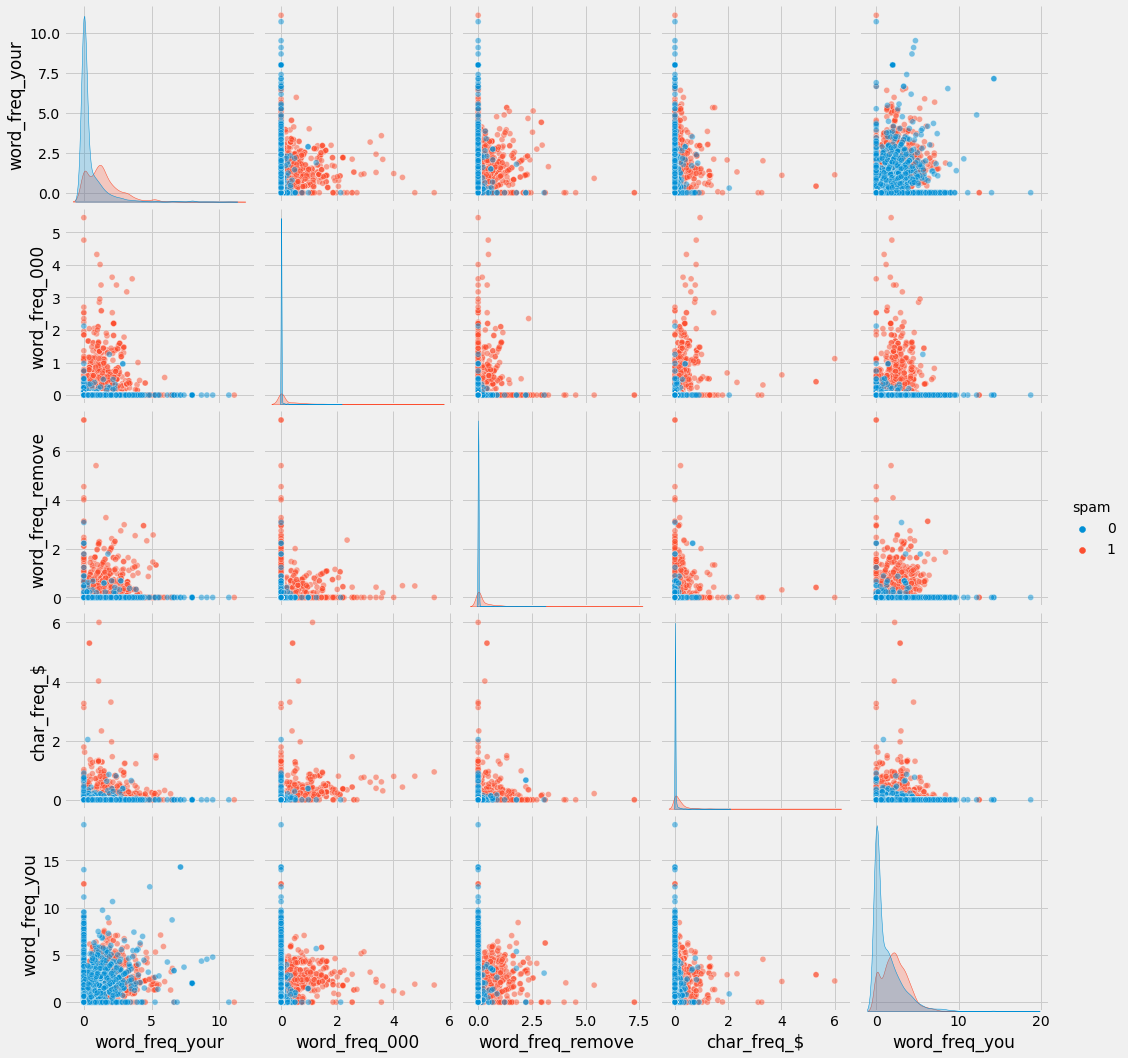

In [10]:
sns.pairplot(data=df[top_5_cols+["spam"]],
             hue="spam",
             plot_kws={'alpha':0.5},
             height=3,
             aspect=1)
plt.show()

#### Non spam minus spam bar graph

In [11]:
df_average_cap = pd.pivot_table(df,
               values=["capital_run_length_average",
                       "capital_run_length_longest",
                       "capital_run_length_total"],
               index="spam",
               aggfunc="mean")

From pivot table we can see that for spam emails "capital_run_length_longest" and "capital_run_length_total" have largest values

In [12]:
df_average_cap

,capital_run_length_average,capital_run_length_longest,capital_run_length_total
spam,,,
0,2.377301,18.214491,161.470947
1,9.519165,104.393271,470.619415


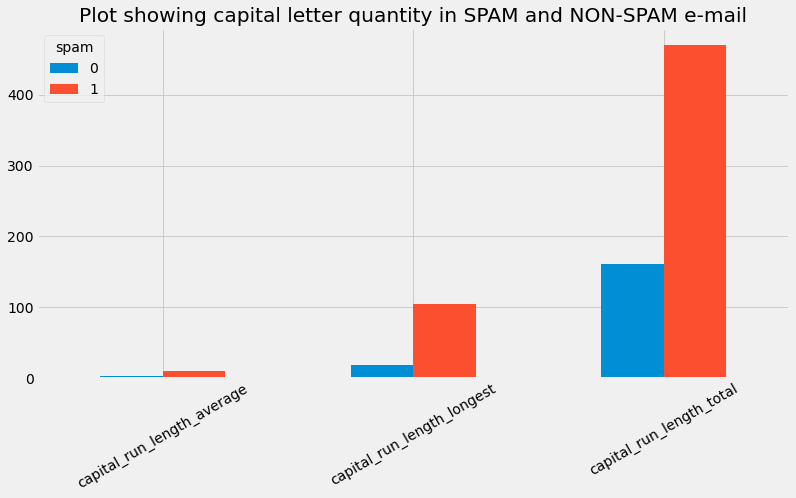

In [13]:
df_average_cap.T.plot(kind="bar", figsize=(12, 6),
                      title="Plot showing capital letter quantity in SPAM and NON-SPAM e-mail")
plt.xticks(rotation=30)
plt.show()

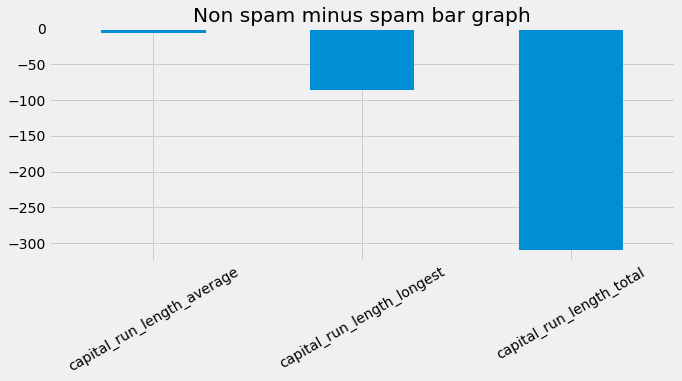

In [14]:
plt.title("Non spam minus spam bar graph")
(df_average_cap.iloc[0]-df_average_cap.iloc[1]).plot(kind="bar", figsize=(10, 4))
plt.xticks(rotation=30)
plt.show()

#### Bokeh graph

In [15]:
df_average_freq_all = pd.pivot_table(df,
               values=df.drop(["spam", "capital_run_length_average",
                               "capital_run_length_longest",
                               "capital_run_length_total"],
                              axis=1).columns[:-1],
               index="spam",
               aggfunc="mean")

df_average_freq_all_subt = df_average_freq_all.iloc[0] - df_average_freq_all.iloc[1]

df_average_freq_all_subt.head()

char_freq_!   -0.403729
char_freq_$   -0.162830
char_freq_(    0.049608
char_freq_;    0.029708
char_freq_[    0.014485
dtype: float64

In [16]:
data_source = ColumnDataSource(dict(words=df_average_freq_all_subt.index.tolist(), 
                                    frequency=df_average_freq_all_subt.tolist()))

p = figure(x_range=df_average_freq_all_subt.index.tolist(), 
           y_range=(df_average_freq_all_subt.min(), df_average_freq_all_subt.max()), 
           height=700, width=1500, 
           title="Difference of spam and non-spam average frequency",
           toolbar_location=None, tools="")

p.vbar(x='words', top='frequency', width=0.8, source=data_source, 
       fill_color=factor_cmap('words', palette=Turbo256[30:], 
                              factors=df_average_freq_all_subt.index.tolist()))
p.xaxis.major_label_orientation = "vertical"

output_file("sp_nsp_freq.html")
show(p)